<center>

# Compulsory Assignment 2 

## Natural Language Processing [KAN - CSCO1002U]
<center>

##  0. Importing Modules 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import gensim.downloader as api
import nltk
import re
import gensim

from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## 1. Importing the Data 

In [2]:
# Importing training and test set 
train = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_2/NLP/Project/train.csv")
test = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_2/NLP/Project/test.csv")
print(test.head())
print(train.head())

                                             article  topic  publication
0  intention presidentelect donald trump put end ...      7            1
1  board member uber arianna huffington active tr...      2            1
2  live blog european stock type live eikon news ...      7            1
3  peter bergen national security analyst vice pr...      7            3
4  m scott lutheran pastor one recent morning hap...      7            2
   publication                                            article  topic
0            2  fiat chrysler autombiles recalling jeep wrangl...      2
1            1  ottawa march china provided scientific evidenc...      2
2            1  cybersecurity company started two former natio...      2
3            2  washington federal aviation administration sai...      2
4            1  san francisco last october angellist company h...      2


In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342876 entries, 0 to 342875
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   publication  342876 non-null  int64 
 1   article      342876 non-null  object
 2   topic        342876 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41183 entries, 0 to 41182
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   article      41183 non-null  object
 1   topic        41183 non-null  int64 
 2   publication  41183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 965.4+ KB
None


In [4]:
# Creating a sample 
train = train.sample(n=5000, random_state = 9)
test = test.sample(n=1000, random_state = 9)

In [3]:
# Shuffeling the data 
train = train.sample(frac=1).reset_index(drop=True)

Text(0.5, 1.0, 'Publication Value Counts for Training set')

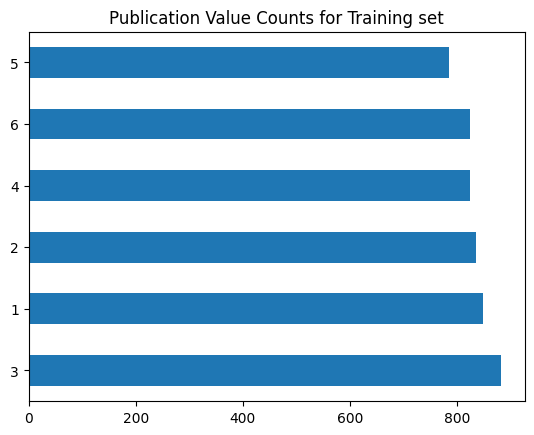

In [6]:
# Countplot shows the distribution of Publication
train['publication'].value_counts().plot(kind ='barh').set_title('Publication Value Counts for Training set')

Text(0.5, 1.0, 'Publication Value Counts for Test set')

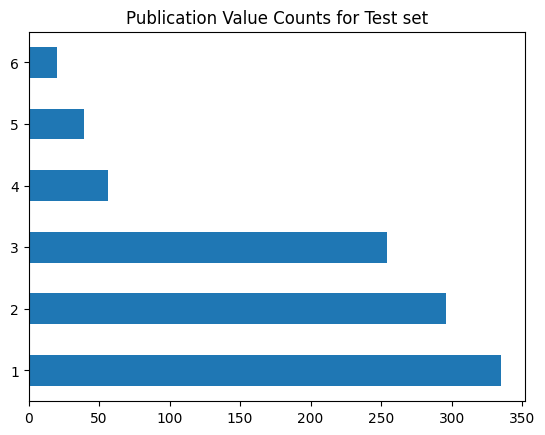

In [7]:
# Countplot shows the distribution of Publication
test['publication'].value_counts().plot(kind ='barh').set_title('Publication Value Counts for Test set')

In [8]:
# Function for Cleaning text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    # Tokenize the article into words
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a cleaned article
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [10]:
# Cleaning the text
train['content'] = train['article'].apply(clean)
test['article'] = test['article'].apply(clean)

In [8]:
train.head()

,publication,article,topic
0,3,samantha vinograd national security analyst se...,7
1,4,russia began delivering airdefense system turk...,7
2,3,explosive new book cowritten former intelligen...,7
3,4,bytedance making effort separate videosharing ...,7
4,6,dubai united arab emirate husband iranianbriti...,7


In [9]:
test.head()

,article,topic,publication
36785,u.s oil output stock drilling slowing oil dema...,7,1
40901,president trump met white house friday wayne l...,4,2
24486,fareed zakaria made provocative argument show ...,4,3
6800,moscow russian election official monday barred...,7,2
35645,moscow andrei chernikov informationtechnology ...,7,2


## 2. Word Embeddings

### 2.1 Bag of Words 

In [10]:
# CountVectorizer 
BoW = CountVectorizer()
BoW.fit(train['article'])

CountVectorizer()

### 2.2 Word2Vect - Trained on our own data

Got codes from: 
https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/

In [4]:
# Tokenizing the cleaned text
train_text = train['article']
train_tokens = train_text.apply(word_tokenize)

test_text = test['article']
test_tokens = test_text.apply(word_tokenize)

In [12]:
# Training the Word2Vec model 
wvT = Word2Vec(train_tokens, 
               vector_size = 100, 
               window = 5, 
               min_count = 2, 
               workers = 4)

In [13]:
# Function for vectorizing the text
def vectorize(tokens):
    words = tokens.split()
    words_vecs = [wvT.wv[word] for word in words if word in wvT.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

### 2.3 Word2Vec - Trained by Google

Got codes from Exercise Class

In [5]:
# Google trained one 
wvG = api.load('word2vec-google-news-300')

In [6]:
# Function for computing the average vector 
# Gathered from Exercise 8

def avg_feature_vector(words, model, num_features):
    n_words = 0
    feature_vec = np.zeros((num_features, ), dtype='float32')
    for word in words:
        try:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
        except KeyError:
            pass
    if n_words == 0:
        return feature_vec
    else:
        return feature_vec / n_words


## 3. Text Classification 

In [7]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    '''
    Function for Evaluating a model
    Prints out:
    --- Classification Report 
    --- Confusion Matrix
    '''
    
    print(f"\033[34m{model_name}\033[0m")
    
    #print Classification Report and Accuracy
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred, zero_division=False))
    print(f" \033[32mAccuracy Score:\033[0m")
    print(accuracy_score(y_test, y_pred)*100)

### 3.1 Baseline Models

#### 3.1.1 Logistic Regression with Bag of Words

In [17]:
# Extracting features and content
y_test = test['publication']
y_train = train['publication']
X_test = test['article']
X_train = train['article']

Logistic Regression with BoW
 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.77      0.79       335
           2       0.91      0.73      0.81       296
           3       0.76      0.68      0.72       254
           4       0.50      0.80      0.62        56
           5       0.71      1.00      0.83        39
           6       0.22      0.80      0.34        20

    accuracy                           0.75      1000
   macro avg       0.65      0.80      0.68      1000
weighted avg       0.80      0.75      0.76      1000

 Confusion Matrix:


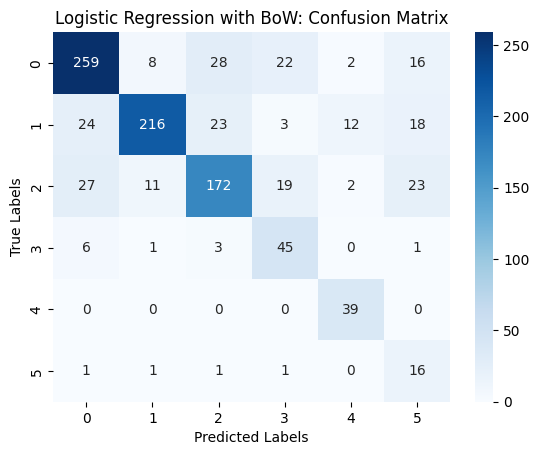

In [18]:
# Vectorizer 
X_train_bow = BoW.transform(X_train)
X_test_bow = BoW.transform(X_test)

# Classifier 
lr_bow = LogisticRegression(max_iter=1000000)
lr_bow.fit(X_train_bow, y_train)

# Evaluate
yPred_lr_bow = lr_bow.predict(X_test_bow)
evaluate(y_test, yPred_lr_bow, 'Logistic Regression with BoW')

In [19]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test, yPred_lr_bow) *100)

Accuracy: 74.7


#### 3.1.2 Random Forest with Bag of Words

Random Forest with BoW
 Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.80      0.81       335
           2       0.87      0.68      0.77       296
           3       0.69      0.76      0.72       254
           4       0.79      0.80      0.80        56
           5       0.93      0.97      0.95        39
           6       0.22      0.75      0.34        20

    accuracy                           0.76      1000
   macro avg       0.72      0.79      0.73      1000
weighted avg       0.80      0.76      0.77      1000

 Confusion Matrix:


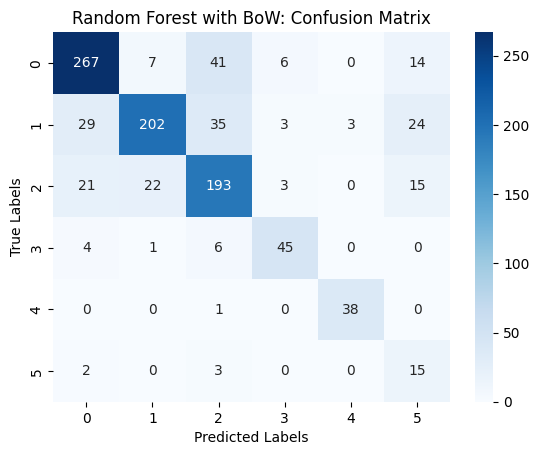

In [20]:
# Classifier 
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow, y_train)

# Evaluate
yPred_rf_bow = rf_bow.predict(X_test_bow)
evaluate(y_test, yPred_rf_bow, 'Random Forest with BoW')

In [21]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test, yPred_rf_bow) *100)

Accuracy: 76.0


#### 3.1.3 Logistic Regression with own trained Word2Vec embeddings

In [22]:
# Vectorizing
X_train_wvT = np.array([vectorize(train_tokens) for train_tokens in X_train])
X_test_wvT = np.array([vectorize(train_tokens) for train_tokens in X_test])

Logisitic Regression with own W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.67      0.73       335
           2       0.84      0.54      0.66       296
           3       0.60      0.60      0.60       254
           4       0.26      0.59      0.36        56
           5       0.46      0.90      0.61        39
           6       0.18      0.70      0.29        20

    accuracy                           0.62      1000
   macro avg       0.53      0.67      0.54      1000
weighted avg       0.71      0.62      0.64      1000

 Confusion Matrix:


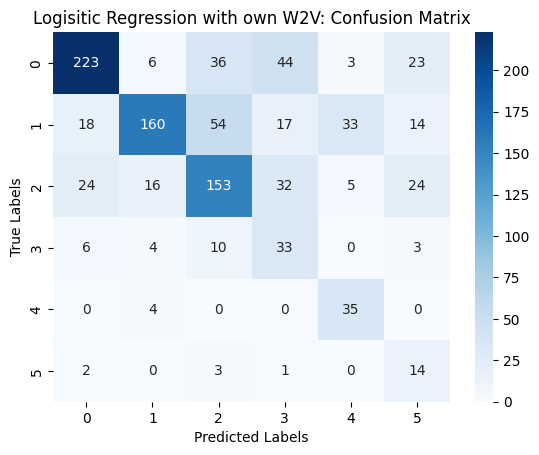

In [23]:
# Classifier 
lr_wvT = LogisticRegression(max_iter=1000000)
lr_wvT.fit(X_train_wvT, y_train)

# Evaluate
yPred_lr_wvT = lr_wvT.predict(X_test_wvT)
evaluate(y_test, yPred_lr_wvT, 'Logisitic Regression with own W2V')

In [24]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test, yPred_lr_wvT) *100)

Accuracy: 61.8


#### 3.1.4 Random Forest with own trained Word2Vec embeddings

Random Forest with own W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.64      0.71       335
           2       0.74      0.45      0.56       296
           3       0.62      0.65      0.64       254
           4       0.24      0.50      0.33        56
           5       0.38      0.90      0.54        39
           6       0.11      0.45      0.17        20

    accuracy                           0.58      1000
   macro avg       0.48      0.60      0.49      1000
weighted avg       0.68      0.58      0.61      1000

 Confusion Matrix:


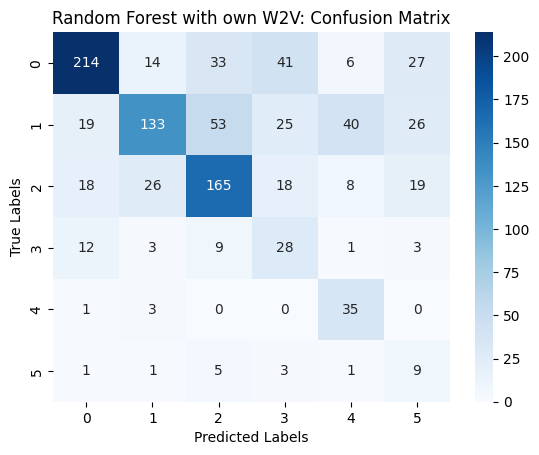

In [25]:
# Classifier 
rf_wvT = RandomForestClassifier()
rf_wvT.fit(X_train_wvT, y_train)

# Evaluate
yPred_rf_wvT = rf_wvT.predict(X_test_wvT)
evaluate(y_test, yPred_rf_wvT, 'Random Forest with own W2V')

In [26]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test, yPred_rf_wvT) *100)

Accuracy: 58.4


#### 3.1.3 Logistic Regression with Google trained Word2Vec embeddings

In [9]:
# Constructing average vectors 
train_features = []
vectorsize = 300
for t in train_tokens:
    train_features.append(avg_feature_vector(t, wvG, vectorsize))    


In [8]:
test_features = []
vectorsize = 300
for t in test_tokens:
    test_features.append(avg_feature_vector(t, wvG, vectorsize))    

In [10]:
# Splitting the data 
X_train_wvG = train_features
X_test_wvG = test_features
y_train_wvG = train['publication']
y_test_wvG = test['publication']

In [ ]:
# Classifier  
lr_wvG = LogisticRegression(max_iter=1000000)
lr_wvG.fit(X_train_wvG, y_train_wvG)

# Evaluate
yPred_lr_wvG = lr_wvG.predict(X_test_wvG)
evaluate(y_test_wvG, yPred_lr_wvG, 'Logistic Regression with Google W2V')

In [ ]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test_wvG, yPred_lr_wvG) *100)

Accuracy: 56.699999999999996


#### 3.1.5 Random Forest with Google trained Word2Vec embeddings

In [ ]:
# Classifier 
rf_wvG = RandomForestClassifier()
rf_wvG.fit(X_train_wvG, y_train_wvG)

# Evaluate 
yPred_rf_wvG = rf_wvG.predict(X_test_wvG)
evaluate(y_train_wvG, yPred_rf_wvG, 'Random Forest with Google W2V')



In [ ]:
print(classification_report(y_test_wvG, yPred_rf_wvG))

              precision    recall  f1-score   support

           1       0.79      0.63      0.70       335
           2       0.65      0.37      0.47       296
           3       0.56      0.54      0.55       254
           4       0.23      0.48      0.31        56
           5       0.29      0.74      0.42        39
           6       0.11      0.55      0.18        20

    accuracy                           0.52      1000
   macro avg       0.44      0.55      0.44      1000
weighted avg       0.62      0.52      0.55      1000



In [45]:
# Accuracy 
print('Accuracy:', accuracy_score(y_test_wvG, yPred_rf_wvG) *100)

Accuracy: 52.300000000000004


### 3.2 Neural Networks

### 3.3 BERT Models

#### 3.3.1 BERT Base 

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [14]:
df.head()

,publication,content
0,New York Times,washington congressional republican new fear c...
1,New York Times,bullet shell get counted blood dry votive cand...
2,New York Times,walt disney bambi opened 1942 critic praised s...
3,New York Times,death may great equalizer isnt necessarily eve...
4,New York Times,seoul south korea north korea leader kim said ...


In [15]:
# Loading the DistilBERT 
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
# Tokenize the text 
tokenized = df['content'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


In [17]:
# Padding 
max_len = 0 
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [18]:
np.array(padded).shape

(49829, 18001)

In [19]:
# Masking 
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(49829, 18001)

In [23]:
# Running Through Destiled BERT 
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2755497458688 bytes.

: 

In [22]:
# Saving features
features = last_hidden_states[0][:,0,:].numpy()
labels = df['publication']

NameError: name 'last_hidden_states' is not defined

In [ ]:
# Splitting the data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
# Classifier 
lr_DBERT = LogisticRegression()
lr_DBERT.fit(train_features, train_labels)


# Evaluate 
yPred_lr_DBERT = lr_DBERT.predict(test_features)
evaluate(train_labels, yPred_lr_DBERT, 'Logistic Regression with Distiled BERT embeddings')

#### 3.3.2 ALBERT 